# Milestone 1

# Introduction

Nama: Karina Maharani Utomo
Batch: 003
Hacktiv8 Full Time Data Science Program

Project Milestone ini menggunakan dataset Bank Marketing, yang dapat diunduh [disini](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#)

Data attributes:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

**related with the last contact of the current campaign:**
8. contact: contact communication type (categorical: 'cellular','telephone') 
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**other attributes:**
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**social and economic context attributes**
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric) 
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**
21. y - has the client subscribed a term deposit? (binary: 'yes','no')

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import FeatureUnion

from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

%matplotlib inline

# Data Loading

In [2]:
# Loading data

data = pd.read_csv('bank-additional-full.csv', sep = ';')
pd.set_option('display.max_columns', None)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
data.shape

(41188, 21)

Dataset ini memiliki 41188 baris dan 21 kolom

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
data.astype('object').describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188.0,41188.000,41188.0,41188.000,41188.0,41188
unique,78,12,4,8,3,3,3,2,10,5,1544,42,27,8,3,10.0,26.000,26.0,316.000,11.0,2
top,31,admin.,married,university.degree,no,yes,no,cellular,may,thu,90,1,999,0,nonexistent,1.4,93.994,-36.4,4.857,5228.1,no
freq,1947,10422,24928,12168,32588,21576,33950,26144,13769,8623,170,17642,39673,35563,35563,16234.0,7763.000,7763.0,2868.000,16234.0,36548


# Data Cleaning

In [7]:
# Mengecek keberadaan data duplikat

data.duplicated().sum()

12

Dataset ini memiliki 12 baris yang berupa duplikat, yang perlu dihapus

In [8]:
# Menampilkan baris duplikat

data[data.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [9]:
# Menghapus baris duplikat

data = data.drop_duplicates(keep='first')
data.reset_index(drop = True, inplace = True)

In [10]:
data.shape

(41176, 21)

Data sekarang memiliki 41176 baris

In [11]:
# Mengecek keberadaan missing value

data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Dataset ini tidak memiliki missing value

# Data Exploration

## Plot Data Numerik & Kategorikal

In [12]:
# Menseleksi data numerik

numbers = data.select_dtypes(include=['int64','float64']).copy()
numbers.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [13]:
list(numbers.columns)

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

Dataset ini memiliki 10 kolom yang berisikan data numerik

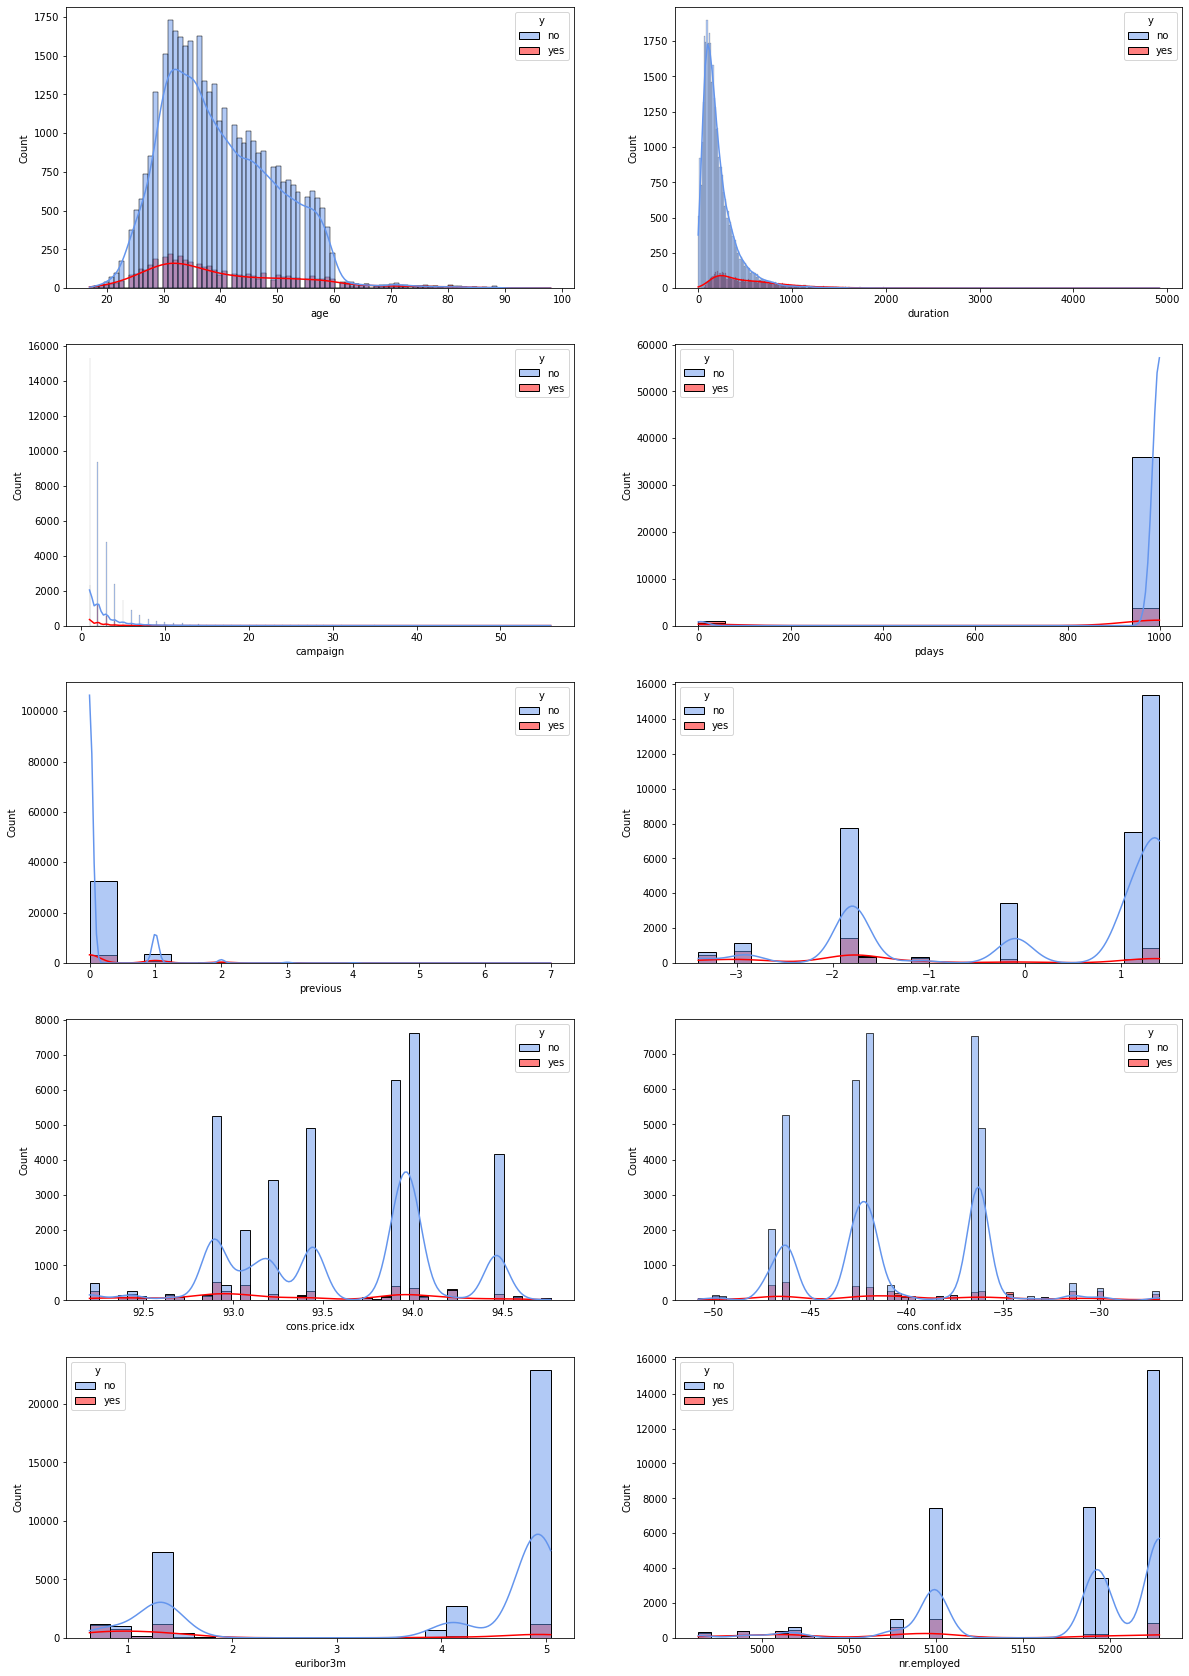

In [14]:
plt.figure(figsize=(20,30))

for i, col in enumerate(list(numbers.columns)):
    i += 1
    plt.subplot(5,2,i)
    sns.histplot(data = numbers, x = numbers[col], hue = data['y'], 
                 palette = {'yes':'red', 'no':'cornflowerblue'}, kde = True)

Dari plot, terlihat bahwa orang-orang yang subscribe ke term deposit paling banyak yang:
1. Berusia 31 - 37 tahun
2. Memiliki durasi kontak terakhir selama sekitar 500 detik
3. Memiliki jumlah kontak sebelum campaign ini sebanyak 0 kali
4. Memiliki employment variation rate sebesar -2
5. Memiliki consumer price index sebesar 93 dan 94
6. Memiliki consumer confidence index sebesar -40.5
7. Memiliki euribor 3 month rate sekitar senilai 1 - 1.5
8. Memiliki number of employees sebanyak 5100

In [15]:
objects = data.select_dtypes(include=['object']).copy()
objects.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


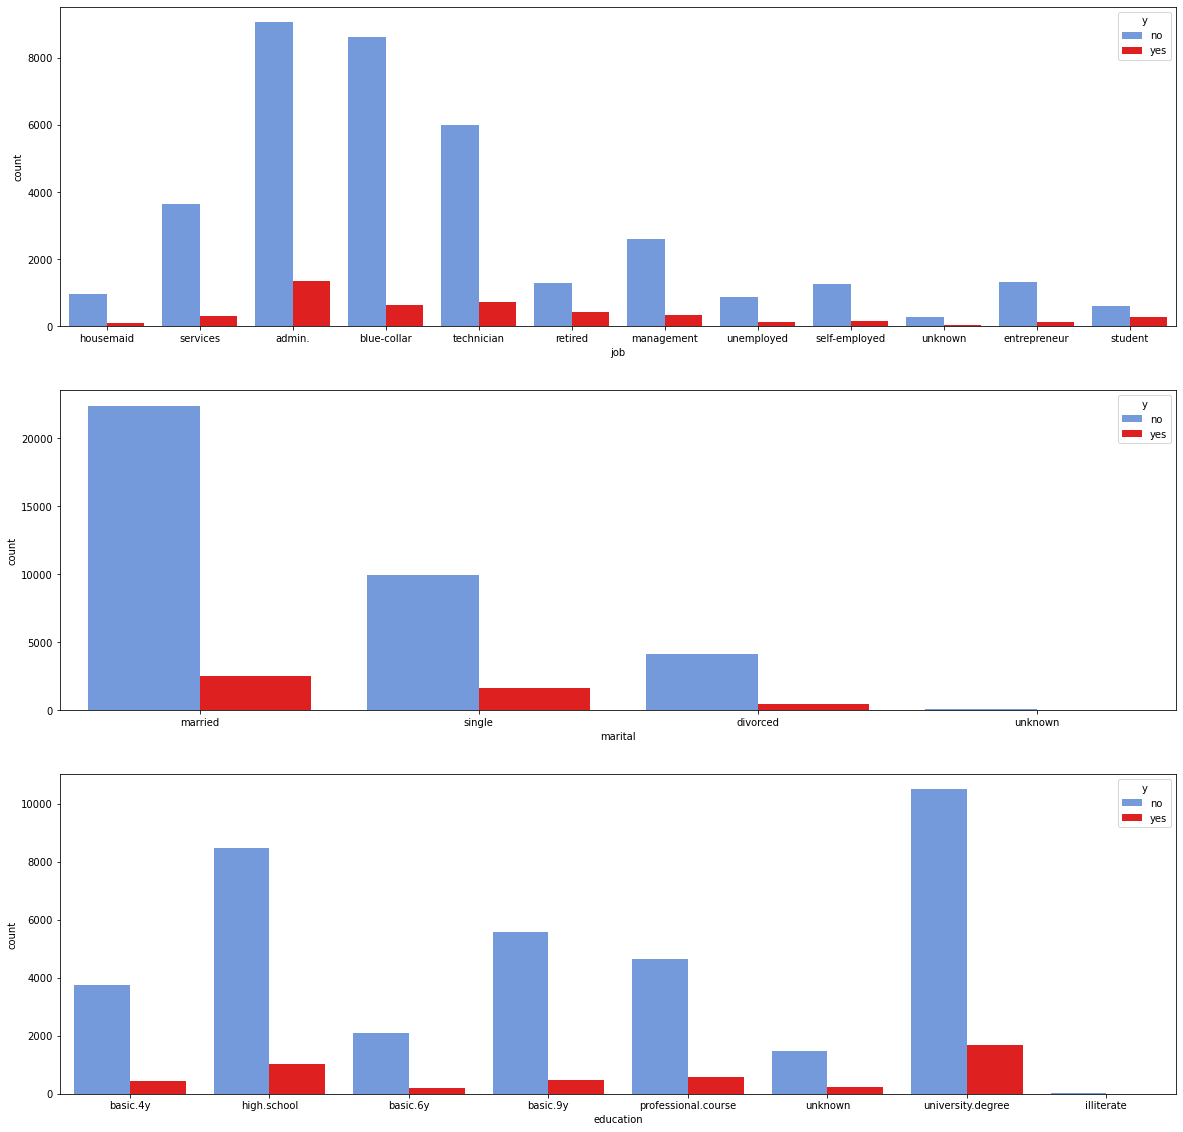

In [16]:
plt.figure(figsize=(20,20))

for i, col in enumerate(list(objects.columns)[:3]):
    i += 1
    plt.subplot(3,1,i)
    sns.countplot(x = data[list(objects.columns)[-1+i]], hue = data['y'], 
                 palette = {'yes':'red', 'no':'cornflowerblue'})

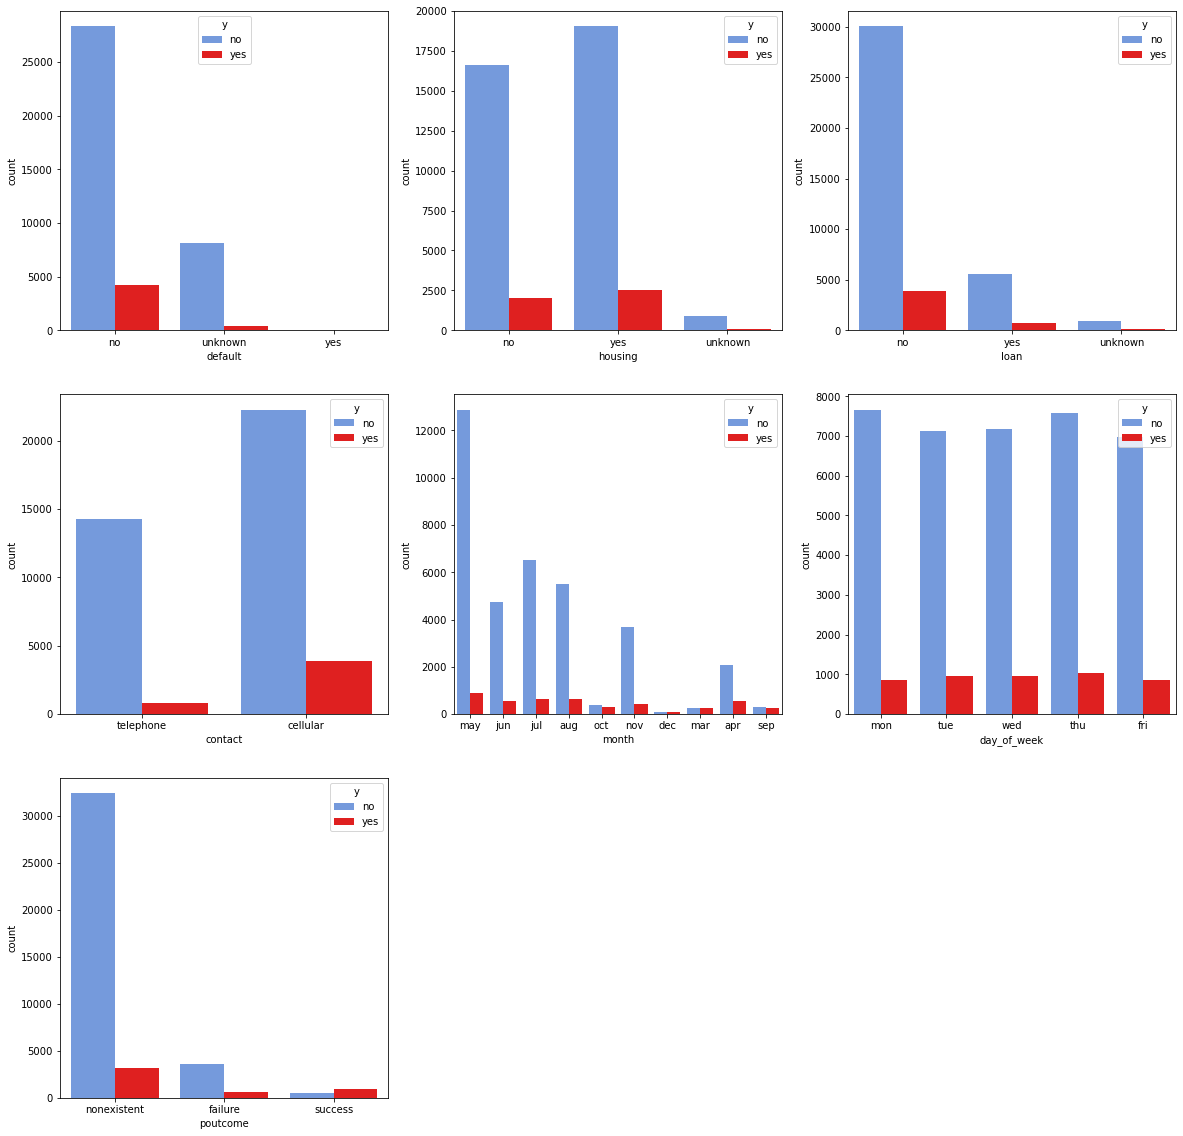

In [17]:
plt.figure(figsize=(20,20))

for i, col in enumerate(list(objects.columns)[3:10]):
    i += 1
    plt.subplot(3,3,i)
    sns.countplot(x = data[list(objects.columns)[2+i]], hue = data['y'], 
                 palette = {'yes':'red', 'no':'cornflowerblue'})

Dari plot, terlihat bahwa orang-orang yang subscribe ke term deposit paling banyak yang:
1. Bekerja sebagai blue-collar, management, dan technician
2. Sudah menikah
3. Level edukasinya kuliah
4. Tidak memiliki credit in default
5. Memiliki housing loan
6. Tidak memiliki personal loan
7. Dikontak melalui cellular
8. Terakhir di kontak pada bulan Mei
9. Tidak memiliki outcome dari campaign sebelumnya. Dalam kata lain, tidak dikontak pada campaign sebelumnya

In [18]:
data['y'].value_counts()

no     36537
yes     4639
Name: y, dtype: int64

Dapat dilihat bahwa pada data ini, jumlah orang yang tidak subscribe term deposit jauh lebih banyak dari jumlah orang yang subscribe. Dapat dikatakan bahwa dataset ini sangat imbalanced

In [19]:
# Mengubah value dari target menjadi numerikal

data['y'] = data['y'].replace({'no': 0, 'yes':1})

## Korelasi antar kolom

Agar heatmap lebih enak dilihat, values pada kolom kategorikal akan diganti dengan angka

In [20]:
data_corr = data.copy()
data_corr.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [21]:
objects = data_corr.select_dtypes(include=['object']).copy()
objects.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [22]:
objects.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [23]:
for col in objects:
    print(col)
    print(objects[col].unique())
    print()

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

marital
['married' 'single' 'divorced' 'unknown']

education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

default
['no' 'unknown' 'yes']

housing
['no' 'yes' 'unknown']

loan
['no' 'yes' 'unknown']

contact
['telephone' 'cellular']

month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']

poutcome
['nonexistent' 'failure' 'success']



In [24]:
data_corr['job'] = data_corr['job'].replace({'unknown': 0,  'student': 1, 'admin.': 2, 'blue-collar': 3,
                                             'technician': 4, 'retired': 5, 'management': 6, 'unemployed': 7,
                                             'self-employed': 8, 'housemaid': 9, 'entrepreneur': 10, 'services': 11})
data_corr['marital'] = data_corr['marital'].replace({'unknown' : 0 ,'single' : 1, 'married' : 2, 'divorce' : 3})
data_corr['education'] = data_corr['education'].replace({'illiterate' : 0 ,'unknown' : 1, 'basic.4y' : 2, 'basic.6y' : 3,
                                                        'basic.9y' : 4, 'high.school' : 5, 'professional.course' : 6,
                                                        'university.degree' : 7})
data_corr['default'] = data_corr['default'].replace({'no' : 0, 'yes' : 1, 'unknown' : 2})
data_corr['housing'] = data_corr['housing'].replace({'no' : 0, 'yes' : 1, 'unknown' : 2})
data_corr['loan'] = data_corr['loan'].replace({'no' :0, 'yes' : 1, 'unknown' : 2})
data_corr['contact'] = data_corr['contact'].replace({'telephone' : 0, 'cellular' : 1})
data_corr['month'] = data_corr['month'].replace({'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 
                                                'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12})
data_corr['day_of_week'] = data_corr['day_of_week'].replace({'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5})
data_corr['poutcome'] = data_corr['poutcome'].replace({'failure' : 0, 'success' : 1, 'nonexistent' : 2})

In [25]:
data_corr.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,9,2,2,0,0,0,0,5,1,261,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0
1,57,11,2,5,2,0,0,0,5,1,149,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0
2,37,11,2,5,0,1,0,0,5,1,226,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0
3,40,2,2,3,0,0,0,0,5,1,151,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0
4,56,11,2,5,0,0,1,0,5,1,307,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0


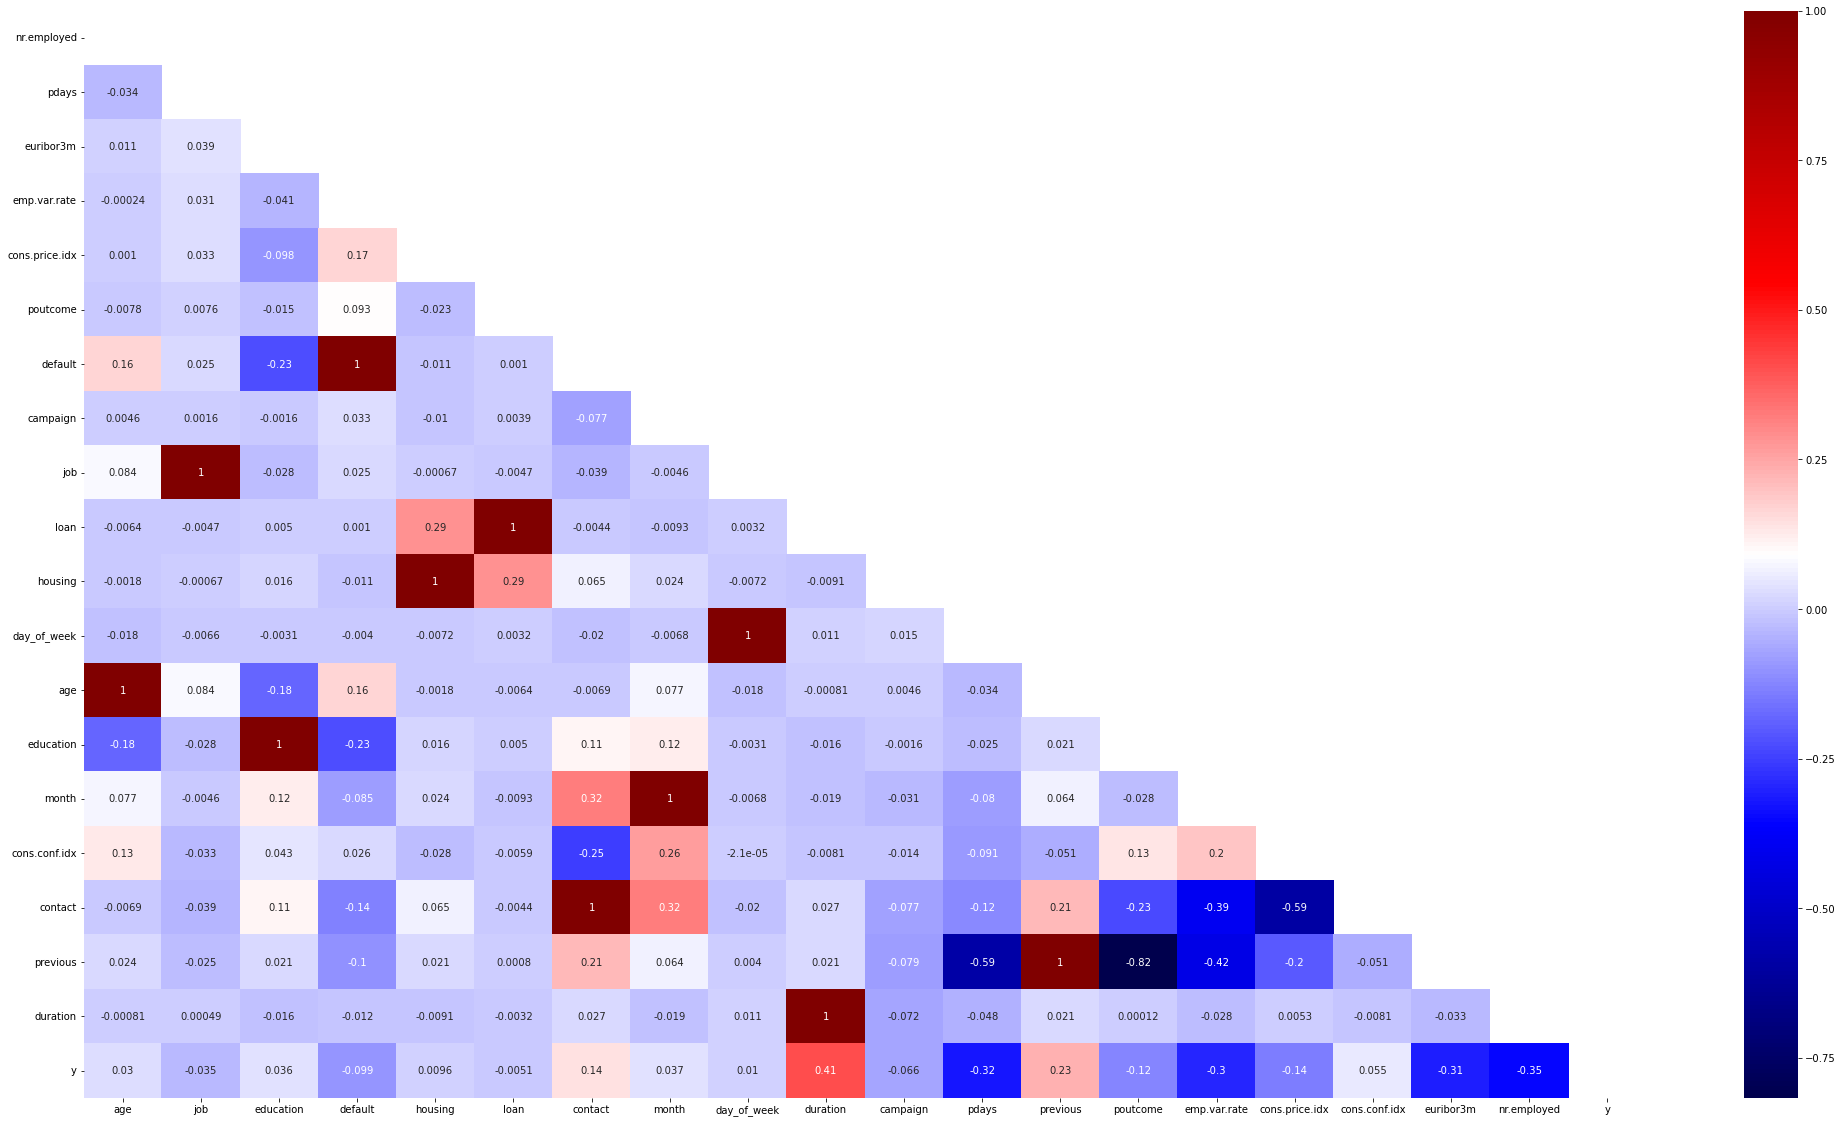

In [26]:
plt.figure(figsize = (35,20))
sns.heatmap(pd.DataFrame(data_corr.corr()).sort_values(by=['y']), annot = True, cmap = 'seismic', mask = np.triu(data_corr.corr()))

plt.show()

Dari heatmap, dapat dilihat bahwa kolom y memiliki korelasi positif paling tinggi dengan kolom duration, previous, dan contact. Untuk korelasi negatif paling tinggi dengan kolom y, dimiliki oleh kolom nr.employed, pdays, euribor3m, dan emp.var.rate

# Data Preprocessing

Pada data yang digunakan untuk pembentukan model, kolom duration tidak akan diikutsertakan. Hal ini karena pada data description, kolom duration disarankan untuk di drop apabila ingin membuat predictive model, karena kolom tersebut sangat berhubungan dengan kolom target

In [27]:
# Menghapus kolom duration

data_model = data.drop('duration', axis = 1)
data_model.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


Sebelum melakukan splitting data, akan dilakukan grouping values untuk kolom kategorikal dengan unique value yang banyak. Hal ini agar data tidak terlalu sparse

In [28]:
# Melihat unique values dari setiap kolom kategorikal

for col in objects:
    print(col)
    print(objects[col].unique())
    print()

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

marital
['married' 'single' 'divorced' 'unknown']

education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

default
['no' 'unknown' 'yes']

housing
['no' 'yes' 'unknown']

loan
['no' 'yes' 'unknown']

contact
['telephone' 'cellular']

month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']

poutcome
['nonexistent' 'failure' 'success']



In [29]:
# Melakukan grouping value kolom month

data_model['month'] = data_model['month'].replace(['apr', 'may', 'jun'], 'second_quarter')
data_model['month'] = data_model['month'].replace(['jul', 'aug', 'sep'], 'third_quarter')
data_model['month'] = data_model['month'].replace(['oct', 'nov', 'dec'], 'fourth_quarter')

In [30]:
# Melakukan grouping value kolom job

data_model["job"] = data_model["job"].replace(['housemaid', 'services', 'blue-collar', 'technician'], 'blue_collars')
data_model["job"] = data_model["job"].replace(['admin.', 'management', 'entrepreneur'], 'white_collars')
data_model["job"] = data_model["job"].replace(['student', 'retired', 'unemployed'], 'not_working')

In [31]:
# Melakukan grouping value kolom education

data_model["education"] = data_model["education"].replace(['basic.4y', 'basic.6y', 'basic.9y'], 'before_hs')
data_model["education"] = data_model["education"].replace(['professional.course', 'university.degree'], 'after_hs')

In [32]:
# Melihat kembali unique values setelah dilakukan grouping

for col in data_model:
    print(col)
    print(data_model[col].unique())
    print()

age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

job
['blue_collars' 'white_collars' 'not_working' 'self-employed' 'unknown']

marital
['married' 'single' 'divorced' 'unknown']

education
['before_hs' 'high.school' 'after_hs' 'unknown' 'illiterate']

default
['no' 'unknown' 'yes']

housing
['no' 'yes' 'unknown']

loan
['no' 'yes' 'unknown']

contact
['telephone' 'cellular']

month
['second_quarter' 'third_quarter' 'fourth_quarter' 'mar']

day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']

campaign
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]

pdays
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]

previous
[0 1 2 3 4 5 6 7]

poutcome
['nonexistent' 'failure

Akan dilakukan penggabungan kolom housing dan loan. Untuk nilai unknown dari masing-masing kolom, value tersebut akan diganti dengan unique value dengan jumlah data paling banyak

In [33]:
data_model['housing'].value_counts()

yes        21571
no         18615
unknown      990
Name: housing, dtype: int64

In [34]:
data_model['loan'].value_counts()

no         33938
yes         6248
unknown      990
Name: loan, dtype: int64

Untuk kolom housing, nilai unknown akan diganti dengan value 'yes'. Sedangkan untuk kolom loan, akan diganti dengan value 'no'

In [35]:
data_model['housing'] = data_model["housing"].replace(['unknown'], 'yes')
data_model['loan'] = data_model["loan"].replace(['unknown'], 'no')

In [36]:
# Mengganti value no dengan 0 dan value yes dengan 1

data_model['housing'] = data_model['housing'].replace({'no': 0, 'yes':1})
data_model['loan'] = data_model['loan'].replace({'no': 0, 'yes':1})

Kolom baru housing_or_loan akan berisi nilai minimum dari kolom housing dan loan

In [37]:
# Mencari nilai minimum dari masing-masing baris

out_arr = np.minimum(data_model['housing'], data_model['loan']) 
pd.DataFrame(out_arr)

,0
0,0
1,0
2,0
3,0
4,0
...,...
41171,0
41172,0
41173,0
41174,0


In [38]:
# Memasukkan hasil ke dalam kolom baru

data_model['housing_or_loan'] = pd.DataFrame(out_arr)

In [39]:
# Menghapus kolom housing dan loan

data_model.drop(columns = ['housing', 'loan'], axis = 1, inplace = True)

In [40]:
data_model.head()

,age,job,marital,education,default,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,housing_or_loan
0,56,blue_collars,married,before_hs,no,telephone,second_quarter,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
1,57,blue_collars,married,high.school,unknown,telephone,second_quarter,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
2,37,blue_collars,married,high.school,no,telephone,second_quarter,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
3,40,white_collars,married,before_hs,no,telephone,second_quarter,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
4,56,blue_collars,married,high.school,no,telephone,second_quarter,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0


## Splitting Data

In [41]:
X = data_model.drop('y', axis = 1)
y = data_model['y']

Dapat dilihat kembali bahwa dataset ini sangat imbalanced

In [42]:
print('Presentase subscribed to term deposit    :', '%.3f' % ((sum(data_model['y'] == 0)/len(data_model['y']))*100), '%')
print('Presentase not subscribed to term deposit:', '%.3f' % ((sum(data_model['y'] == 1)/len(data_model['y']))*100), '%')

Presentase subscribed to term deposit    : 88.734 %
Presentase not subscribed to term deposit: 11.266 %


In [43]:
X1, X_test, y1, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0, shuffle=True, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X1, y1, test_size = 2/8, random_state = 0, shuffle=True, stratify = y1)

In [44]:
# Melihat hasil splitting data

print('Presentase data yang digunakan untuk training data  :', '%.2f' % ((len(X_train)/len(X))*100), '%')
print('Presentase data yang digunakan untuk evaluation data:', '%.2f' % ((len(X_val)/len(X))*100), '%')
print('Presentase data yang digunakan untuk test data      :', '%.2f' % ((len(X_test)/len(X))*100), '%')
print()

print('Jumlah data training  :', X_train.shape[0])
print('Jumlah data validation:', X_val.shape[0])
print('Jumlah data test      :', X_test.shape[0])

Presentase data yang digunakan untuk training data  : 67.50 %
Presentase data yang digunakan untuk evaluation data: 22.50 %
Presentase data yang digunakan untuk test data      : 10.00 %

Jumlah data training  : 27793
Jumlah data validation: 9265
Jumlah data test      : 4118


Dapat dilihat bahwa data dibagi menjadi 3 bagian. 10% akan digunakan untuk test data yang nantinya digunakan pada model inference, 22,5% untuk data evaluation, dan 67,5% untuk training data

In [45]:
# Mengecek pembagian target dari hasil splitting data

print('Presentase data subscribed term deposit')
print()
print('Data awal      :', '%.3f' % ((sum(data['y'] == 1)/len(data['y']))*100), '%')
print('Training data  :', '%.3f' % ((sum(y_train == 1)/len(y_train))*100), '%')
print('Evaluation data:', '%.3f' % ((sum(y_val == 1)/len(y_val))*100), '%')
print('Test data      :', '%.3f' % ((sum(y_test == 1)/len(y_test))*100), '%')

Presentase data subscribed term deposit

Data awal      : 11.266 %
Training data  : 11.265 %
Evaluation data: 11.268 %
Test data      : 11.268 %


Dapat dilihat bahwa pembagian data target variable pada training, evaluation, dan test data sama dengan data awal

## Features Scaling & Encoding

Preprocessing features akan dilakukan dengan pipeline. Pada kolom numerik, akan dilakukan proses scaling. Pada kolom kategorikal, akan dilakukan proses encoding

In [46]:
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [47]:
# Membuat pipeline untuk kolom numerik
numerical_pipeline = Pipeline([
    ("select_numeric", OldDataFrameSelector(['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'housing_or_loan'])),
    ("std_scaler", StandardScaler()),
])

# Membuat pipeline untuk kolom kategorikal
categorical_pipeline = Pipeline([
    ("select_cat", OldDataFrameSelector(['job', 'marital', 'education', 'default', 'contact',
                                      'month', 'day_of_week', 'poutcome'])),
    ('cat_encoder', OneHotEncoder(sparse=False))
])

# Menggabungkan kedua pipelines
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("numerical_pipeline", numerical_pipeline),
        ("categorical_pipeline", categorical_pipeline),
    ])

In [48]:
# Preprocessing features dari training data

X_train = preprocess_pipeline.fit_transform(X_train)
X_train

array([[ 1.14348194,  0.16064226, -0.34711037, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.18649431, -0.56829331, -0.34711037, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.18649431, -0.20382553, -0.34711037, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.00490321, -0.20382553, -0.34711037, ...,  0.        ,
         1.        ,  0.        ],
       [-0.86619208, -0.20382553, -0.34711037, ...,  0.        ,
         1.        ,  0.        ],
       [-0.86619208, -0.56829331, -0.34711037, ...,  0.        ,
         1.        ,  0.        ]])

In [49]:
# Preprocessing features dari data evaluation

X_val = preprocess_pipeline.transform(X_val)
X_val

array([[-0.96189084, -0.56829331, -0.34711037, ...,  0.        ,
         1.        ,  0.        ],
       [-1.24898713,  0.52511005,  3.72259582, ...,  0.        ,
         0.        ,  1.        ],
       [-0.67479455, -0.56829331, -0.34711037, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.67479455,  1.25404563, -0.34711037, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.81337328, -0.20382553, -0.34711037, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.18649431, -0.20382553, -0.34711037, ...,  0.        ,
         1.        ,  0.        ]])

## GridSearch untuk Hyperparameter Tuning

Untuk Milestone project ini, akan dilakukan perbandingan model Logistic Regression, SVC, Decision Tree, Random Forest, AdaBoost, GradientBoost, K-Nearest Neighbors, dan Naive Bayes. Sebelum melakukan pendifinisian model, akan dilakukan hyperparameter tuning terlebih dahulu untuk mendapatkan kombinasi hyperparameter terbaik dari setiap model. Kombinasi hyperparameter terbaik akan ditentukan dari AUC score tertinggi

**1. Logistic Regression**

In [50]:
params = {
    'C': [0.01, 0.1, 0.5],
    'penalty': ['l1', 'l2']
}

model_eval = {
    'auc_score': 'roc_auc',
    'f1_score': 'f1'
}

model_lr = LogisticRegression(random_state = 0, solver = 'liblinear')
lr_search = GridSearchCV(model_lr, params, cv = 5, scoring = model_eval, refit = 'auc_score', return_train_score=True)
%time lr_search.fit(X_train, y_train)

CPU times: user 16.8 s, sys: 544 ms, total: 17.4 s
Wall time: 14.3 s


GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 0.5], 'penalty': ['l1', 'l2']},
             refit='auc_score', return_train_score=True,
             scoring={'auc_score': 'roc_auc', 'f1_score': 'f1'})

In [51]:
print('Best parameters:', lr_search.best_params_)
print('Best score     :', lr_search.best_score_)

Best parameters: {'C': 0.5, 'penalty': 'l1'}
Best score     : 0.7918244142732561


In [52]:
pd.DataFrame(lr_search.cv_results_)[['params', 'rank_test_auc_score', 'mean_test_auc_score', 'mean_train_auc_score', 
                                     'rank_test_f1_score', 'mean_test_f1_score', 'mean_train_f1_score']].sort_values('rank_test_auc_score', ascending = True)

,params,rank_test_auc_score,mean_test_auc_score,mean_train_auc_score,rank_test_f1_score,mean_test_f1_score,mean_train_f1_score
4,"{'C': 0.5, 'penalty': 'l1'}",1,0.791824,0.794781,3,0.329280,0.330435
5,"{'C': 0.5, 'penalty': 'l2'}",2,0.791576,0.794789,1,0.330235,0.331219
3,"{'C': 0.1, 'penalty': 'l2'}",3,0.791099,0.794179,2,0.329777,0.331324
2,"{'C': 0.1, 'penalty': 'l1'}",4,0.791050,0.793983,4,0.326281,0.328453
1,"{'C': 0.01, 'penalty': 'l2'}",5,0.786467,0.788885,5,0.308710,0.311383
0,"{'C': 0.01, 'penalty': 'l1'}",6,0.780884,0.782211,6,0.254962,0.259192


Untuk model Logistic Regression, kombinasi hyperparameter terbaik adalah 'C': 0.5, 'penalty': 'l1', dengan:
1. Rata-rata AUC score sebesar 0.79 untuk data evaluation dan 0.79 untuk data training
2. Rata-rata F1 score sebesar 0.33 untuk data evaluation dan 0.33 untuk data training 

**2. SVC**

In [53]:
params = {
    'C': [0.5, 1.0],
    'kernel': ['linear', 'rbf']
}

model_eval = {
    'auc_score': 'roc_auc',
    'f1_score': 'f1'
}

model_svc = SVC(random_state = 0)
svc_search = GridSearchCV(model_svc, params, cv = 5, scoring = model_eval, refit = 'auc_score', return_train_score=True)
%time svc_search.fit(X_train, y_train)

CPU times: user 11min 27s, sys: 11 s, total: 11min 38s
Wall time: 12min 2s


GridSearchCV(cv=5, estimator=SVC(random_state=0),
             param_grid={'C': [0.5, 1.0], 'kernel': ['linear', 'rbf']},
             refit='auc_score', return_train_score=True,
             scoring={'auc_score': 'roc_auc', 'f1_score': 'f1'})

In [54]:
print('Best parameters:', svc_search.best_params_)
print('Best score     :', svc_search.best_score_)

Best parameters: {'C': 0.5, 'kernel': 'rbf'}
Best score     : 0.7046223562914469


In [55]:
pd.DataFrame(svc_search.cv_results_)[['params', 'rank_test_auc_score', 'mean_test_auc_score', 'mean_train_auc_score', 
                                     'rank_test_f1_score', 'mean_test_f1_score', 'mean_train_f1_score']].sort_values('rank_test_auc_score', ascending = True)

,params,rank_test_auc_score,mean_test_auc_score,mean_train_auc_score,rank_test_f1_score,mean_test_f1_score,mean_train_f1_score
1,"{'C': 0.5, 'kernel': 'rbf'}",1,0.704622,0.826720,2,0.322863,0.345137
3,"{'C': 1.0, 'kernel': 'rbf'}",2,0.702499,0.841055,1,0.344026,0.366606
0,"{'C': 0.5, 'kernel': 'linear'}",3,0.639120,0.642623,3,0.300459,0.300491
2,"{'C': 1.0, 'kernel': 'linear'}",4,0.597711,0.597916,3,0.300459,0.300491


Untuk model SVC, kombinasi hyperparameter terbaik adalah 'C': 0.5, 'kernel': 'rbf', dengan:
1. Rata-rata AUC score sebesar 0.7 untuk data evaluation dan 0.82 untuk data training
2. Rata-rata F1 score sebesar 0.32 untuk data evaluation dan 0.34 untuk data training 

Terdapat kemungkinan terjadi overfitting pada model ini

**3. Decision Tree**

In [56]:
params = {
    'max_depth': [10, 30, 100],
    'min_samples_split': [5, 30, 100],
    'min_samples_leaf' : [1, 10, 30],
    'max_features': ['auto', 'log2']
}

model_eval = {
    'auc_score': 'roc_auc',
    'f1_score': 'f1'
}

model_dt = DecisionTreeClassifier(random_state = 0)
dt_search = GridSearchCV(model_dt, params, cv = 5, scoring = model_eval, refit = 'auc_score', return_train_score=True)
%time dt_search.fit(X_train, y_train)

CPU times: user 16.4 s, sys: 630 ms, total: 17.1 s
Wall time: 18 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [10, 30, 100],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 10, 30],
                         'min_samples_split': [5, 30, 100]},
             refit='auc_score', return_train_score=True,
             scoring={'auc_score': 'roc_auc', 'f1_score': 'f1'})

In [57]:
print('Best parameters:', dt_search.best_params_)
print('Best score     :', dt_search.best_score_)

Best parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 30, 'min_samples_split': 100}
Best score     : 0.789806516257296


In [58]:
pd.DataFrame(dt_search.cv_results_)[['params', 'rank_test_auc_score', 'mean_test_auc_score', 'mean_train_auc_score', 
                                     'rank_test_f1_score', 'mean_test_f1_score', 'mean_train_f1_score']].sort_values('rank_test_auc_score', ascending = True)

,params,rank_test_auc_score,mean_test_auc_score,mean_train_auc_score,rank_test_f1_score,mean_test_f1_score,mean_train_f1_score
8,"{'max_depth': 10, 'max_features': 'auto', 'min...",1,0.789807,0.816058,17,0.355629,0.377132
5,"{'max_depth': 10, 'max_features': 'auto', 'min...",2,0.788048,0.820857,6,0.361598,0.387198
2,"{'max_depth': 10, 'max_features': 'auto', 'min...",3,0.787971,0.822289,13,0.356932,0.384836
14,"{'max_depth': 10, 'max_features': 'log2', 'min...",4,0.787474,0.817233,50,0.329988,0.363330
16,"{'max_depth': 10, 'max_features': 'log2', 'min...",5,0.786406,0.815711,47,0.331271,0.365297
15,"{'max_depth': 10, 'max_features': 'log2', 'min...",5,0.786406,0.815711,47,0.331271,0.365297
6,"{'max_depth': 10, 'max_features': 'auto', 'min...",7,0.785243,0.819588,33,0.342796,0.374190
7,"{'max_depth': 10, 'max_features': 'auto', 'min...",7,0.785243,0.819588,33,0.342796,0.374190
17,"{'max_depth': 10, 'max_features': 'log2', 'min...",9,0.781967,0.811575,19,0.354901,0.369428
12,"{'max_depth': 10, 'max_features': 'log2', 'min...",10,0.781161,0.826248,8,0.359612,0.410851


Untuk model Decision Tree, kombinasi hyperparameter terbaik adalah 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 30, 'min_samples_split': 100, dengan:
1. Rata-rata AUC score sebesar 0.79 untuk data evaluation dan 0.82 untuk data training
2. Rata-rata F1 score sebesar 0.35 untuk data evaluation dan 0.38 untuk data training 

**4. Random Forest**

In [59]:
params = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 30],
    'min_samples_leaf' : [5, 10],
    'n_estimators': [50, 100, 200]
}

model_eval = {
    'auc_score': 'roc_auc',
    'f1_score': 'f1'
}

model_rf = RandomForestClassifier(random_state = 0)
rf_search = GridSearchCV(model_rf, params, cv = 5, scoring = model_eval, refit = 'auc_score', return_train_score=True)
%time rf_search.fit(X_train, y_train)

CPU times: user 6min 53s, sys: 5.81 s, total: 6min 59s
Wall time: 7min 9s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 10, 20], 'min_samples_leaf': [5, 10],
                         'min_samples_split': [2, 30],
                         'n_estimators': [50, 100, 200]},
             refit='auc_score', return_train_score=True,
             scoring={'auc_score': 'roc_auc', 'f1_score': 'f1'})

In [60]:
print('Best parameters:', rf_search.best_params_)
print('Best score     :', rf_search.best_score_)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best score     : 0.8026062615463625


In [61]:
pd.DataFrame(rf_search.cv_results_)[['params', 'rank_test_auc_score', 'mean_test_auc_score', 'mean_train_auc_score', 
                                     'rank_test_f1_score', 'mean_test_f1_score', 'mean_train_f1_score']].sort_values('rank_test_auc_score', ascending = True)

,params,rank_test_auc_score,mean_test_auc_score,mean_train_auc_score,rank_test_f1_score,mean_test_f1_score,mean_train_f1_score
20,"{'max_depth': 10, 'min_samples_leaf': 10, 'min...",1,0.802606,0.851861,16,0.354699,0.393837
16,"{'max_depth': 10, 'min_samples_leaf': 5, 'min_...",2,0.802401,0.850842,12,0.356751,0.398808
17,"{'max_depth': 10, 'min_samples_leaf': 5, 'min_...",3,0.802277,0.851734,13,0.356508,0.401183
14,"{'max_depth': 10, 'min_samples_leaf': 5, 'min_...",4,0.802247,0.858628,7,0.361469,0.427946
19,"{'max_depth': 10, 'min_samples_leaf': 10, 'min...",5,0.802201,0.850769,21,0.352232,0.392252
23,"{'max_depth': 10, 'min_samples_leaf': 10, 'min...",6,0.802098,0.849973,19,0.353433,0.386636
13,"{'max_depth': 10, 'min_samples_leaf': 5, 'min_...",7,0.801812,0.857245,9,0.360730,0.425137
18,"{'max_depth': 10, 'min_samples_leaf': 10, 'min...",8,0.801801,0.849733,17,0.354634,0.394171
22,"{'max_depth': 10, 'min_samples_leaf': 10, 'min...",9,0.801585,0.849025,22,0.352045,0.386231
12,"{'max_depth': 10, 'min_samples_leaf': 5, 'min_...",10,0.801550,0.855340,8,0.361018,0.427276


Untuk model Random Forest, kombinasi hyperparameter terbaik adalah 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 200, dengan:
1. Rata-rata AUC score sebesar 0.80 untuk data evaluation dan 0.85 untuk data training
2. Rata-rata F1 score sebesar 0.35 untuk data evaluation dan 0.39 untuk data training 

**5. AdaBoost**

In [62]:
params = {
    'learning_rate': [0.1, 0.5, 1],
    'n_estimators': [50, 100]
}

model_eval = {
    'auc_score': 'roc_auc',
    'f1_score': 'f1'
}

model_ab = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 2), random_state = 0)
ab_search = GridSearchCV(model_ab, params, cv = 5, scoring = model_eval, refit = 'auc_score', return_train_score=True)
%time ab_search.fit(X_train, y_train)

CPU times: user 1min 36s, sys: 1.02 s, total: 1min 37s
Wall time: 1min 38s


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                                          random_state=0),
             param_grid={'learning_rate': [0.1, 0.5, 1],
                         'n_estimators': [50, 100]},
             refit='auc_score', return_train_score=True,
             scoring={'auc_score': 'roc_auc', 'f1_score': 'f1'})

In [63]:
print('Best parameters:', ab_search.best_params_)
print('Best score     :', ab_search.best_score_)

Best parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Best score     : 0.7978245831057517


In [64]:
pd.DataFrame(ab_search.cv_results_)[['params', 'rank_test_auc_score', 'mean_test_auc_score', 'mean_train_auc_score', 
                                     'rank_test_f1_score', 'mean_test_f1_score', 'mean_train_f1_score']].sort_values('rank_test_auc_score', ascending = True)

,params,rank_test_auc_score,mean_test_auc_score,mean_train_auc_score,rank_test_f1_score,mean_test_f1_score,mean_train_f1_score
1,"{'learning_rate': 0.1, 'n_estimators': 100}",1,0.797825,0.810701,5,0.308160,0.316532
2,"{'learning_rate': 0.5, 'n_estimators': 50}",2,0.797502,0.822167,4,0.344929,0.361516
4,"{'learning_rate': 1, 'n_estimators': 50}",3,0.796433,0.828870,2,0.362984,0.387902
3,"{'learning_rate': 0.5, 'n_estimators': 100}",4,0.795547,0.832920,3,0.361012,0.394429
0,"{'learning_rate': 0.1, 'n_estimators': 50}",5,0.793873,0.800912,6,0.286798,0.290885
5,"{'learning_rate': 1, 'n_estimators': 100}",6,0.790528,0.840522,1,0.364486,0.419024


Untuk model AdaBoost, kombinasi hyperparameter terbaik adalah 'learning_rate': 0.1, 'n_estimators': 100, dengan:
1. Rata-rata AUC score sebesar 0.80 untuk data evaluation dan 0.81 untuk data training
2. Rata-rata F1 score sebesar 0.31 untuk data evaluation dan 0.32 untuk data training 

**6. GradientBoost**

In [65]:
params = {
    'max_depth': [3, 10],
    'learning_rate': [0.1, 1],
    'n_estimators': [3, 30, 100]
}

model_eval = {
    'auc_score': 'roc_auc',
    'f1_score': 'f1'
}

model_gb = GradientBoostingClassifier(random_state = 0)
gb_search = GridSearchCV(model_gb, params, cv = 5, scoring = model_eval, refit = 'auc_score', return_train_score=True)
%time gb_search.fit(X_train, y_train)

CPU times: user 4min 3s, sys: 2.41 s, total: 4min 6s
Wall time: 4min 15s


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 1], 'max_depth': [3, 10],
                         'n_estimators': [3, 30, 100]},
             refit='auc_score', return_train_score=True,
             scoring={'auc_score': 'roc_auc', 'f1_score': 'f1'})

In [66]:
print('Best parameters:', gb_search.best_params_)
print('Best score     :', gb_search.best_score_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best score     : 0.7975678655603115


In [67]:
pd.DataFrame(gb_search.cv_results_)[['params', 'rank_test_auc_score', 'mean_test_auc_score', 'mean_train_auc_score', 
                                     'rank_test_f1_score', 'mean_test_f1_score', 'mean_train_f1_score']].sort_values('rank_test_auc_score', ascending = True)

,params,rank_test_auc_score,mean_test_auc_score,mean_train_auc_score,rank_test_f1_score,mean_test_f1_score,mean_train_f1_score
2,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",1,0.797568,0.811829,6,0.360536,0.388593
1,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",2,0.792068,0.799343,9,0.300000,0.311381
7,"{'learning_rate': 1, 'max_depth': 3, 'n_estima...",3,0.786200,0.811144,4,0.367542,0.428836
4,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",4,0.782744,0.922000,5,0.362897,0.678952
8,"{'learning_rate': 1, 'max_depth': 3, 'n_estima...",5,0.781487,0.822637,2,0.376819,0.467835
6,"{'learning_rate': 1, 'max_depth': 3, 'n_estima...",6,0.774090,0.778928,10,0.293595,0.309453
0,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",7,0.764730,0.767661,11,0.000000,0.000000
5,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",8,0.763352,0.987229,1,0.377238,0.835062
3,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",9,0.753271,0.850478,11,0.000000,0.000000
9,"{'learning_rate': 1, 'max_depth': 10, 'n_estim...",10,0.686645,0.870745,3,0.371226,0.638282


Untuk model GradientBoost, kombinasi hyperparameter terbaik adalah 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, dengan:
1. Rata-rata AUC score sebesar 0.80 untuk data evaluation dan 0.81 untuk data training
2. Rata-rata F1 score sebesar 0.36 untuk data evaluation dan 0.39 untuk data training 

**7. K-Nearest Neighbors**

In [68]:
params = {
    'n_neighbors': [5, 10],
    'metric': ['euclidean']
}

model_eval = {
    'auc_score': 'roc_auc',
    'f1_score': 'f1'
}

model_knn = KNeighborsClassifier()
knn_search = GridSearchCV(model_knn, params, cv = 5, scoring = model_eval, refit = 'auc_score', return_train_score=True)
%time knn_search.fit(X_train, y_train)

CPU times: user 4min 50s, sys: 1.13 s, total: 4min 52s
Wall time: 4min 54s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean'], 'n_neighbors': [5, 10]},
             refit='auc_score', return_train_score=True,
             scoring={'auc_score': 'roc_auc', 'f1_score': 'f1'})

In [69]:
print('Best parameters:', knn_search.best_params_)
print('Best score     :', knn_search.best_score_)

Best parameters: {'metric': 'euclidean', 'n_neighbors': 10}
Best score     : 0.7509841753678264


In [70]:
pd.DataFrame(knn_search.cv_results_)[['params', 'rank_test_auc_score', 'mean_test_auc_score', 'mean_train_auc_score', 
                                     'rank_test_f1_score', 'mean_test_f1_score', 'mean_train_f1_score']].sort_values('rank_test_auc_score', ascending = True)

,params,rank_test_auc_score,mean_test_auc_score,mean_train_auc_score,rank_test_f1_score,mean_test_f1_score,mean_train_f1_score
1,"{'metric': 'euclidean', 'n_neighbors': 10}",1,0.750984,0.890566,2,0.301395,0.380000
0,"{'metric': 'euclidean', 'n_neighbors': 5}",2,0.725276,0.926609,1,0.359227,0.501524


Untuk model K-Nearest Neighbors, kombinasi hyperparameter terbaik adalah 'metric': 'euclidean', 'n_neighbors': 10, 'n_estimators': 100, dengan:
1. Rata-rata AUC score sebesar 0.75 untuk data evaluation dan 0.89 untuk data training
2. Rata-rata F1 score sebesar 0.30 untuk data evaluation dan 0.38 untuk data training 

Terdapat kemungkinan terjadi overfitting pada model

**8. Naive Bayes**

In [71]:
params = {
    'var_smoothing': [1e-9, 1]
}

model_eval = {
    'auc_score': 'roc_auc',
    'f1_score': 'f1'
}

model_nb = GaussianNB()
nb_search = GridSearchCV(model_nb, params, cv = 5, scoring = model_eval, refit = 'auc_score', return_train_score=True)
%time nb_search.fit(X_train, y_train)

CPU times: user 638 ms, sys: 231 ms, total: 868 ms
Wall time: 872 ms


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1]}, refit='auc_score',
             return_train_score=True,
             scoring={'auc_score': 'roc_auc', 'f1_score': 'f1'})

In [72]:
print('Best parameters:', nb_search.best_params_)
print('Best score     :', nb_search.best_score_)

Best parameters: {'var_smoothing': 1}
Best score     : 0.7667633415542469


In [73]:
pd.DataFrame(nb_search.cv_results_)[['params', 'rank_test_auc_score', 'mean_test_auc_score', 'mean_train_auc_score', 
                                     'rank_test_f1_score', 'mean_test_f1_score', 'mean_train_f1_score']].sort_values('rank_test_auc_score', ascending = True)

,params,rank_test_auc_score,mean_test_auc_score,mean_train_auc_score,rank_test_f1_score,mean_test_f1_score,mean_train_f1_score
1,{'var_smoothing': 1},1,0.766763,0.767252,1,0.395656,0.396611
0,{'var_smoothing': 1e-09},2,0.765547,0.767296,2,0.350433,0.351776


Untuk model Naive Bayes, kombinasi hyperparameter terbaik adalah 'var_smoothing': 1, dengan:
1. Rata-rata AUC score sebesar 0.77 untuk data evaluation dan 0.77 untuk data training
2. Rata-rata F1 score sebesar 0.4 untuk data evaluation dan 0.4 untuk data training 

# Defining Models

Kombinasi hyperparameter terbaik setiap model yang didapat dari GridSearch akan diaplikasikan pada pendefinisian model

In [74]:
best_lr = LogisticRegression(random_state = 0, solver = 'liblinear', C = 0.5, penalty = 'l1')
best_svc = SVC(random_state = 0, C = 0.5, kernel = 'rbf', probability = True)
best_dt = DecisionTreeClassifier(random_state = 0, max_depth = 10, max_features = 'auto', min_samples_leaf = 30, min_samples_split = 100)
best_rf = RandomForestClassifier(random_state = 0, max_depth = 10, min_samples_leaf = 10, min_samples_split = 2, n_estimators = 200)
best_ab = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 2), random_state = 0, learning_rate = 0.1, n_estimators = 100)
best_gb = GradientBoostingClassifier(random_state = 0, learning_rate = 0.1, max_depth = 3, n_estimators = 100)
best_knn = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 10)
best_nb = GaussianNB(var_smoothing = 1)

In [75]:
models = [best_lr, best_svc, best_dt, best_rf, best_ab, best_gb, best_knn, best_nb]

# Model Training

In [76]:
# Fitting model

for model in models:
    print(model)
    %time model.fit(X_train, y_train)
    print()

LogisticRegression(C=0.5, penalty='l1', random_state=0, solver='liblinear')
CPU times: user 919 ms, sys: 11.9 ms, total: 931 ms
Wall time: 933 ms

SVC(C=0.5, probability=True, random_state=0)
CPU times: user 4min 5s, sys: 3.56 s, total: 4min 9s
Wall time: 4min 17s

DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_leaf=30,
                       min_samples_split=100, random_state=0)
CPU times: user 31.7 ms, sys: 7.87 ms, total: 39.6 ms
Wall time: 39.6 ms

RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=200,
                       random_state=0)
CPU times: user 3.34 s, sys: 39.4 ms, total: 3.38 s
Wall time: 3.44 s

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.1, n_estimators=100, random_state=0)
CPU times: user 3.78 s, sys: 16.9 ms, total: 3.79 s
Wall time: 3.81 s

GradientBoostingClassifier(random_state=0)
CPU times: user 6.12 s, sys: 85.5 ms, total: 6.2 s
Wall time: 6.59 s

KNeigh

In [77]:
# Memprediksi target dari training data

print('Predicting y_train with Logistic Regression:')
yp_train_lr = best_lr.predict(X_train)
%time best_lr.predict(X_train)
print()

print('Predicting y_train with SVC:')
yp_train_svc = best_svc.predict(X_train)
%time best_svc.predict(X_train)
print()

print('Predicting y_train with Decision Tree:')
yp_train_dt = best_dt.predict(X_train)
%time best_dt.predict(X_train)
print()

print('Predicting y_train with Random Forest:')
yp_train_rf = best_rf.predict(X_train)
%time best_rf.predict(X_train)
print()

print('Predicting y_train with AdaBoost:')
yp_train_ab = best_ab.predict(X_train)
%time best_ab.predict(X_train)
print()

print('Predicting y_train with GradientBoost:')
yp_train_gb = best_gb.predict(X_train)
%time best_gb.predict(X_train)
print()

print('Predicting y_train with K-Nearest Neighbors:')
yp_train_knn = best_knn.predict(X_train)
%time best_knn.predict(X_train)
print()

print('Predicting y_train with Naive Bayes:')
yp_train_nb = best_nb.predict(X_train)
%time best_nb.predict(X_train)
print()

Predicting y_train with Logistic Regression:
CPU times: user 3.33 ms, sys: 81 µs, total: 3.41 ms
Wall time: 2.33 ms

Predicting y_train with SVC:
CPU times: user 12.4 s, sys: 131 ms, total: 12.6 s
Wall time: 13.3 s

Predicting y_train with Decision Tree:
CPU times: user 3.57 ms, sys: 9 µs, total: 3.58 ms
Wall time: 3.59 ms

Predicting y_train with Random Forest:
CPU times: user 607 ms, sys: 8.45 ms, total: 616 ms
Wall time: 627 ms

Predicting y_train with AdaBoost:
CPU times: user 455 ms, sys: 7.35 ms, total: 462 ms
Wall time: 489 ms

Predicting y_train with GradientBoost:
CPU times: user 59.2 ms, sys: 1.11 ms, total: 60.3 ms
Wall time: 65.2 ms

Predicting y_train with K-Nearest Neighbors:
CPU times: user 22.2 s, sys: 118 ms, total: 22.3 s
Wall time: 22.9 s

Predicting y_train with Naive Bayes:
CPU times: user 11.2 ms, sys: 2.63 ms, total: 13.8 ms
Wall time: 13.8 ms



In [78]:
# Memprediksi target dari data evaluation

print('Predicting y_val with Logistic Regression:')
yp_val_lr = best_lr.predict(X_val)
%time best_lr.predict(X_val)
print()

print('Predicting y_val with SVC:')
yp_val_svc = best_svc.predict(X_val)
%time best_lr.predict(X_val)
print()

print('Predicting y_val with Decision Tree:')
yp_val_dt = best_dt.predict(X_val)
%time best_dt.predict(X_val)
print()

print('Predicting y_val with Random Forest:')
yp_val_rf = best_rf.predict(X_val)
%time best_rf.predict(X_val)
print()

print('Predicting y_train with AdaBoost:')
yp_val_ab = best_ab.predict(X_val)
%time best_ab.predict(X_val)
print()

print('Predicting y_train with GradientBoost:')
yp_val_gb = best_gb.predict(X_val)
%time best_gb.predict(X_val)
print()

print('Predicting y_train with K-Nearest Neighbors:')
yp_val_knn = best_knn.predict(X_val)
%time best_knn.predict(X_val)
print()

print('Predicting y_train with Naive Bayes:')
yp_val_nb = best_nb.predict(X_val)
%time best_nb.predict(X_val)
print()

Predicting y_val with Logistic Regression:
CPU times: user 1.3 ms, sys: 49 µs, total: 1.35 ms
Wall time: 681 µs

Predicting y_val with SVC:
CPU times: user 900 µs, sys: 25 µs, total: 925 µs
Wall time: 731 µs

Predicting y_val with Decision Tree:
CPU times: user 2.97 ms, sys: 195 µs, total: 3.17 ms
Wall time: 1.6 ms

Predicting y_val with Random Forest:
CPU times: user 224 ms, sys: 1.73 ms, total: 226 ms
Wall time: 227 ms

Predicting y_train with AdaBoost:
CPU times: user 144 ms, sys: 1.93 ms, total: 146 ms
Wall time: 146 ms

Predicting y_train with GradientBoost:
CPU times: user 13.5 ms, sys: 32 µs, total: 13.6 ms
Wall time: 13.6 ms

Predicting y_train with K-Nearest Neighbors:
CPU times: user 7.43 s, sys: 34.1 ms, total: 7.46 s
Wall time: 7.61 s

Predicting y_train with Naive Bayes:
CPU times: user 3.85 ms, sys: 923 µs, total: 4.78 ms
Wall time: 4.79 ms



In [79]:
yp_trains = [yp_train_lr, yp_train_svc, yp_train_dt, yp_train_rf, yp_train_ab, yp_train_gb, yp_train_knn, yp_train_nb]
yp_vals = [yp_val_lr, yp_val_svc, yp_val_dt, yp_val_rf, yp_val_ab, yp_val_gb, yp_val_knn, yp_val_nb]
model_names = ['Logistic Regression', 'SVC', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradientBoost', 'K-Nearest Neighbors', 'Naive Bayes']

# Model Evaluation

**Accuracy, AUC Score, F1 Score**

In [80]:
print('Model Evaluation (Training Data)')
print()

i = 0
for train in yp_trains:
    print(f'{i+1}.', model_names[i])
    print('Accuracy Score:', '%.3f' % accuracy_score(y_train, train))
    print('AUC Score     :', '%.3f' % roc_auc_score(y_train, train))
    print('F1 Score      :', '%.3f' % f1_score(y_train, train))
    print()
    i += 1

Model Evaluation (Training Data)

1. Logistic Regression
Accuracy Score: 0.900
AUC Score     : 0.603
F1 Score      : 0.332

2. SVC
Accuracy Score: 0.903
AUC Score     : 0.613
F1 Score      : 0.357

3. Decision Tree
Accuracy Score: 0.903
AUC Score     : 0.629
F1 Score      : 0.389

4. Random Forest
Accuracy Score: 0.907
AUC Score     : 0.630
F1 Score      : 0.398

5. AdaBoost
Accuracy Score: 0.901
AUC Score     : 0.597
F1 Score      : 0.317

6. GradientBoost
Accuracy Score: 0.905
AUC Score     : 0.627
F1 Score      : 0.388

7. K-Nearest Neighbors
Accuracy Score: 0.906
AUC Score     : 0.625
F1 Score      : 0.385

8. Naive Bayes
Accuracy Score: 0.879
AUC Score     : 0.650
F1 Score      : 0.396



In [81]:
print('Model Evaluation (Evaluation Data)')
print()

i = 0
for val in yp_vals:
    print(f'{i+1}.', model_names[i])
    print('Accuracy Score:', '%.3f' % accuracy_score(y_val, val))
    print('AUC Score     :', roc_auc_score(y_val, val))
    print('F1 Score      :', f1_score(y_val, val))
    print()
    i += 1

Model Evaluation (Evaluation Data)

1. Logistic Regression
Accuracy Score: 0.900
AUC Score     : 0.6037595406772954
F1 Score      : 0.33285302593659943

2. SVC
Accuracy Score: 0.901
AUC Score     : 0.6145847751832635
F1 Score      : 0.3583977512297963

3. Decision Tree
Accuracy Score: 0.900
AUC Score     : 0.6269987244143002
F1 Score      : 0.3828647925033467

4. Random Forest
Accuracy Score: 0.900
AUC Score     : 0.6173214354789924
F1 Score      : 0.3630089717046239

5. AdaBoost
Accuracy Score: 0.899
AUC Score     : 0.5956862296865191
F1 Score      : 0.3130051432770022

6. GradientBoost
Accuracy Score: 0.900
AUC Score     : 0.6157098259247298
F1 Score      : 0.3597222222222223

7. K-Nearest Neighbors
Accuracy Score: 0.895
AUC Score     : 0.5983923635433226
F1 Score      : 0.31623330990864373

8. Naive Bayes
Accuracy Score: 0.879
AUC Score     : 0.6539543855773529
F1 Score      : 0.403183023872679



Dari AUC score, dan F1 score, **Model Naive Bayes memiliki performa yang paling baik** dibandingkan yang lain. Model Naive Bayes memiliki:
- AUC Score senilai 0.650 dan F1 Score senilai 0.396 untuk training data
- AUC Score senilai 0.654 dan F1 Score senilai 0.403 untuk evaluation data

Dapat dilihat bahwa performa dari training dan evaluation data tidak jauh beda antar satu sama lain. Dapat dikatakan bahwa model tidak mengalami overfitting

**Classification Report & Confusion Matrix**

In [82]:
print('Classification Report (Training Data)')
print()

i = 0
for train in yp_trains:
    print(f'{i+1}.', model_names[i])
    print(classification_report(y_train, train))
    print('---------------------------------------------------------')
    i += 1

Classification Report (Training Data)

1. Logistic Regression
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     24662
           1       0.68      0.22      0.33      3131

    accuracy                           0.90     27793
   macro avg       0.79      0.60      0.64     27793
weighted avg       0.88      0.90      0.88     27793

---------------------------------------------------------
2. SVC
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     24662
           1       0.70      0.24      0.36      3131

    accuracy                           0.90     27793
   macro avg       0.81      0.61      0.65     27793
weighted avg       0.89      0.90      0.88     27793

---------------------------------------------------------
3. Decision Tree
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     24662
           1       0.66      0.28  

In [83]:
print('Classification Report (Evaluation Data)')
print()

i = 0
for val in yp_vals:
    print(f'{i+1}.', model_names[i])
    print(classification_report(y_val, val))
    print('---------------------------------------------------------')
    i += 1

Classification Report (Evaluation Data)

1. Logistic Regression
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      8221
           1       0.67      0.22      0.33      1044

    accuracy                           0.90      9265
   macro avg       0.79      0.60      0.64      9265
weighted avg       0.88      0.90      0.88      9265

---------------------------------------------------------
2. SVC
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      8221
           1       0.67      0.24      0.36      1044

    accuracy                           0.90      9265
   macro avg       0.79      0.61      0.65      9265
weighted avg       0.88      0.90      0.88      9265

---------------------------------------------------------
3. Decision Tree
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      8221
           1       0.64      0.27

Dari classification report, Model Naive Bayes memiliki nilai recall target 1 yang paling tinggi. Namun, model ini memiliki nilai precision yang paling rendah dibandingkan model lainnya

In [84]:
i = 0

for val in yp_vals:
    cm = confusion_matrix(y_val, val)
    print(f'Confusion matrix Evaluation Data {model_names[i]}\n', cm)
    print()
    
    print('True Positives(TP) = ', cm[0,0])
    print('True Negatives(TN) = ', cm[1,1])
    print('False Positives(FP) = ', cm[0,1])
    print('False Negatives(FN) = ', cm[1,0])
    print('---------------------------------------------------------')
    i += 1

Confusion matrix Evaluation Data Logistic Regression
 [[8108  113]
 [ 813  231]]

True Positives(TP) =  8108
True Negatives(TN) =  231
False Positives(FP) =  113
False Negatives(FN) =  813
---------------------------------------------------------
Confusion matrix Evaluation Data SVC
 [[8097  124]
 [ 789  255]]

True Positives(TP) =  8097
True Negatives(TN) =  255
False Positives(FP) =  124
False Negatives(FN) =  789
---------------------------------------------------------
Confusion matrix Evaluation Data Decision Tree
 [[8057  164]
 [ 758  286]]

True Positives(TP) =  8057
True Negatives(TN) =  286
False Positives(FP) =  164
False Negatives(FN) =  758
---------------------------------------------------------
Confusion matrix Evaluation Data Random Forest
 [[8079  142]
 [ 781  263]]

True Positives(TP) =  8079
True Negatives(TN) =  263
False Positives(FP) =  142
False Negatives(FN) =  781
---------------------------------------------------------
Confusion matrix Evaluation Data AdaBoos

Dari confusion matrix, dapat dilihat bahwa Model Naive Bayes memiliki jumlah False Negative yang paling rendah, namun False Positive yang paling tinggi. Akan tetapi, karena untuk model prediksi ini lebih diutamakan hasil False Negative yang rendah, maka akan dipilih model Naive Bayes

**ROC Curve & AUC Score**

In [85]:
y_scores1 = best_lr.predict_proba(X_val)
y_scores2 = best_svc.predict_proba(X_val)
y_scores3 = best_dt.predict_proba(X_val)
y_scores4 = best_rf.predict_proba(X_val)
y_scores5 = best_ab.predict_proba(X_val)
y_scores6 = best_gb.predict_proba(X_val)
y_scores7 = best_knn.predict_proba(X_val)
y_scores8 = best_nb.predict_proba(X_val)

In [86]:
fpr1, tpr1, thresholds1 = roc_curve(y_val, y_scores1[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_val, y_scores2[:,1])
fpr3, tpr3, thresholds3 = roc_curve(y_val, y_scores3[:,1])
fpr4, tpr4, thresholds4 = roc_curve(y_val, y_scores4[:,1])
fpr5, tpr5, thresholds5 = roc_curve(y_val, y_scores5[:,1])
fpr6, tpr6, thresholds6 = roc_curve(y_val, y_scores6[:,1])
fpr7, tpr7, thresholds7 = roc_curve(y_val, y_scores7[:,1])
fpr8, tpr8, thresholds8 = roc_curve(y_val, y_scores8[:,1])

In [87]:
def plot_roc_curve(fpr, tpr, label=None):
    '''
    ROC Curve plot with diagonal line
    '''
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)  

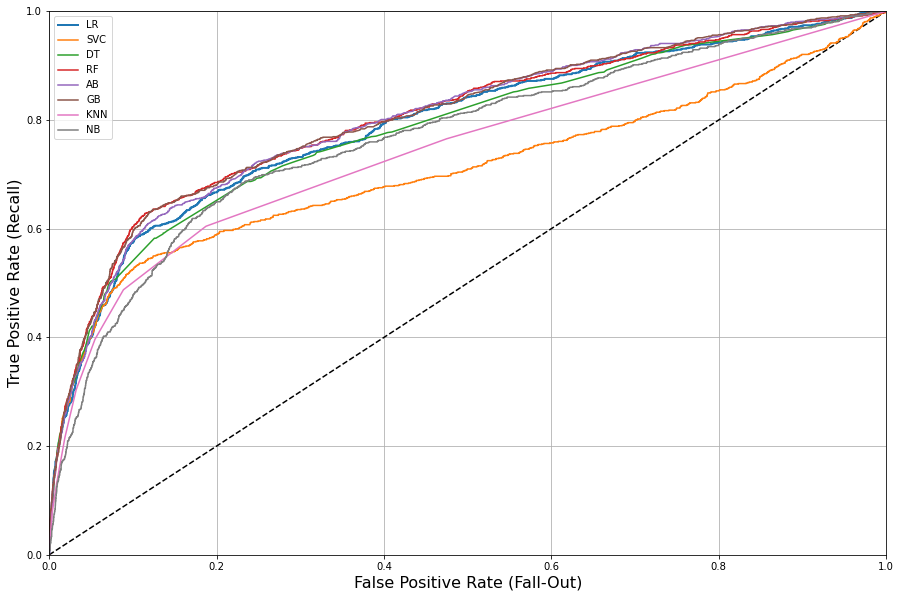

AUC Score

Logistic Regression: 0.604
SVC: 0.615
Decision Tree: 0.627
Random Forest: 0.617
AdaBoost: 0.596
GradientBoost: 0.616
K-Nearest Neighbors: 0.598
Naive Bayes: 0.654


In [88]:
plt.figure(figsize=(15, 10))                                    
plot_roc_curve(fpr1, tpr1, label="LR")
plt.plot(fpr2, tpr2, label="SVC")
plt.plot(fpr3, tpr3, label="DT")
plt.plot(fpr4, tpr4, label="RF")
plt.plot(fpr5, tpr5, label="AB")
plt.plot(fpr6, tpr6, label="GB")
plt.plot(fpr7, tpr7, label="KNN")
plt.plot(fpr8, tpr8, label="NB")
plt.legend()
plt.show()

print('AUC Score')
print()

i = 0
for val in yp_vals:
    print(f'{model_names[i]}:', '%.3f' % roc_auc_score(y_val, val))
    i += 1

Dapat dilihat bahwa model Naive Bayes memiliki AUC score paling tinggi

**Cross Validation**

In [89]:
i = 0

for model in models:
    auc_score = cross_val_score(model, X_val, y_val, scoring = 'roc_auc', cv = 5)
    print(f'Cross Validation score {model_names[i]}:', '%.3f' % np.mean(auc_score))
    i += 1

Cross Validation score Logistic Regression: 0.786
Cross Validation score SVC: 0.705
Cross Validation score Decision Tree: 0.759
Cross Validation score Random Forest: 0.790
Cross Validation score AdaBoost: 0.789
Cross Validation score GradientBoost: 0.798
Cross Validation score K-Nearest Neighbors: 0.741
Cross Validation score Naive Bayes: 0.765


Dari cross validation, dapat dilihat bahwa Random Forest memiliki rata-rata AUC Score paling tinggi

**Kesimpulan**:

Dari perbandingan 8 model, akan dipilih model Naive Bayes untuk Model Inference. Hal ini dikarenakan model Naive Bayes memiliki:
- AUC score dan F1 score paling tinggi dibandingkan model lainnya
- Memiliki nilai Recall paling tinggi untuk target 1

Dipilih model dengan nilai Recall paling tinggi untuk target 1 karena ingin menghindari jumlah False Negative yang banyak. Semakin banyak jumlah prediksi False Negative, semakin banyak orang yang sebenarnya ingin subscribe term deposit diprediksikan sebagai tidak ingin subscribe term deposit

# Model Inference

Untuk Model Inference, akan digunakan test data

In [90]:
X_test = preprocess_pipeline.transform(X_test)
X_test

array([[-1.44038465, -0.20382553, -0.34711037, ...,  0.        ,
         1.        ,  0.        ],
       [-1.24898713, -0.20382553, -0.34711037, ...,  0.        ,
         1.        ,  0.        ],
       [-0.2919995 ,  1.25404563, -0.34711037, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.48339703, -0.56829331, -0.34711037, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.95208441, -0.20382553, -0.34711037, ...,  0.        ,
         1.        ,  0.        ],
       [-0.2919995 , -0.20382553, -0.34711037, ...,  0.        ,
         1.        ,  0.        ]])

In [91]:
X_test

array([[-1.44038465, -0.20382553, -0.34711037, ...,  0.        ,
         1.        ,  0.        ],
       [-1.24898713, -0.20382553, -0.34711037, ...,  0.        ,
         1.        ,  0.        ],
       [-0.2919995 ,  1.25404563, -0.34711037, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.48339703, -0.56829331, -0.34711037, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.95208441, -0.20382553, -0.34711037, ...,  0.        ,
         1.        ,  0.        ],
       [-0.2919995 , -0.20382553, -0.34711037, ...,  0.        ,
         1.        ,  0.        ]])

In [92]:
yp_test = best_nb.predict(X_test)

In [93]:
print('Model Evaluation')
print()

print('Evaluation Data')
print('AUC Score:', '%.3f' % roc_auc_score(y_val, yp_val_nb))
print()
print('Confusion Matirx')
cm = confusion_matrix(y_val, yp_val_nb)
print(cm)
print()
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])
print()
print('Classification Report')
print(classification_report(y_val, yp_val_nb))
print('---------------------------------------------------------')

print('Test Data')
print('AUC Score:', '%.3f' % roc_auc_score(y_test, yp_test))
print()
print('Confusion Matirx')
cm = confusion_matrix(y_test, yp_test)
print(cm)
print()
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])
print()
print('Classification Report')
print(classification_report(y_test, yp_test))

Model Evaluation

Evaluation Data
AUC Score: 0.654

Confusion Matirx
[[7760  461]
 [ 664  380]]

True Positives(TP) =  7760
True Negatives(TN) =  380
False Positives(FP) =  461
False Negatives(FN) =  664

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      8221
           1       0.45      0.36      0.40      1044

    accuracy                           0.88      9265
   macro avg       0.69      0.65      0.67      9265
weighted avg       0.87      0.88      0.87      9265

---------------------------------------------------------
Test Data
AUC Score: 0.640

Confusion Matirx
[[3456  198]
 [ 309  155]]

True Positives(TP) =  3456
True Negatives(TN) =  155
False Positives(FP) =  198
False Negatives(FN) =  309

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      3654
           1       0.44      0.33      0.38       464

    accuracy         

Dapat dilihat bahwa performa evaluation data dan test data tidak jauh berbeda

# Conclusion

Dari **Data Exploration**, didapat bahwa orang-orang yang subscribe ke term deposit paling banyak yang:
1. Berusia 31 - 37 tahun
2. Memiliki durasi kontak terakhir selama sekitar 500 detik
3. Memiliki jumlah kontak sebelum campaign ini sebanyak 0 kali
4. Memiliki employment variation rate sebesar -2
5. Memiliki consumer price index sebesar 93 dan 94
6. Memiliki consumer confidence index sebesar -40.5
7. Memiliki euribor 3 month rate sekitar senilai 1 - 1.5
8. Memiliki number of employees sebanyak 5100
9. Bekerja sebagai blue-collar, management, dan technician
10. Sudah menikah
11. Level edukasinya kuliah
12. Tidak memiliki credit in default
13. Memiliki housing loan
14. Tidak memiliki personal loan
15. Dikontak melalui cellular
16. Terakhir di kontak pada bulan Mei
17. Tidak memiliki outcome dari campaign sebelumnya. Dalam kata lain, tidak dikontak pada campaign sebelumnya

Dari heatmap, dapat dilihat bahwa kolom y memiliki korelasi positif paling tinggi dengan kolom duration, previous, dan contact. Untuk korelasi negatif paling tinggi dengan kolom y, dimiliki oleh kolom nr.employed, pdays, euribor3m, dan emp.var.rate
***
Pada **Data Preprocessing**, dilakukan:
1. Penghapusan kolom duration karena disarankan pada data description
2. Grouping values pada kolom kategorikal agar data tidak terlalu sparse
3. Proses scaling untuk kolom numerik dan encoding untuk kolom kategorikal
***
Dilakukan perbandingan antara model:
1. Logistic Regression
2. SVC
3. Decision Tree
4. Random Forest
5. AdaBoost
6. GradientBoost
7. K-Nearest Neighbors
8. Naive Bayes

Berdasarkan **Model Evaluation**, model yang dipilih adalah model Naive Bayes karena:
- Memiliki AUC score dan F1 score paling tinggi dibandingkan model lainnya
- Memiliki nilai Recall paling tinggi untuk target 1 dibandingkan model lainnya

Dipilih model dengan nilai Recall paling tinggi untuk target 1 untuk menghindari jumlah prediksi False Negative yang banyak

Dari model evaluation, didapat bahwa nilai recall target 1 sangatlah rendah untuk semua model. Sama halnya dengan nilai AUC Score dan F1 Score. Hal ini dapat disebabkan oleh dataset yang sangat imbalanced. Untuk kedepannya, mungkin dapat dilakukan proses resampling data